This notebook will use the functions we established from the other notebooks to compare alpha for different species at different scales.

It is a duplicate of BCI Alpha Data, but the threshold I use is the same at all scales I use thresh=128 everywhere. I also removed a bunch of the other tests to clean it up a bit.

In [1]:
import dd_functions as dd
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# Read in data
bci_full = pd.read_csv('../BCI50HA/bci5.txt',sep='\t')
# Trim to only alive species with dbh>100mm
bci = bci_full.loc[(bci_full['dbh']>=100)&(bci_full['status']=='A')]
# Get total number of species
s0 = bci.sp.nunique()
# Get total number of individuals
n0 = len(bci)
print("Dataset has S0 = {}, N0 = {}".format(s0,n0))

Dataset has S0 = 229, N0 = 20852


# 8 Bisections, 256 Cells, 128 Points

In [3]:
bi8 = dd.bisect(bci,1000,500,level=8)
fr8 = dd.create_f(bi8,thresh=128) # I should set the threshold to at least be ABLE to have one individual per cell
# Get unique species list
spl8 = fr8['sp'].unique()

In [4]:
# Now for each one get the preferred alpha value
alphas8 = []
for sp in spl8:
    args = fr8['sp']==sp
    sol = minimize_scalar(dd.loglikelihood,bounds=(0.1,4),method='bounded',
                args=(np.rint(fr8[args]['frac']*fr8[args]['n0']).astype(int),fr8[args]['n0']))
    alphas8.append(sol.x)
df_a8 = pd.DataFrame(alphas8,index=spl8,columns=['256 Cells'])

Mean: [1.68417285], Median: [1.58911705]


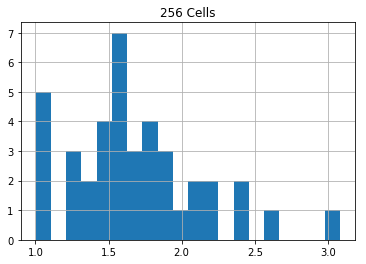

In [5]:
df_a8.hist(bins=20)
print("Mean: {}, Median: {}".format(df_a8.mean().values,df_a8.median().values))

# 7 Bisections, 128 Cells, 64 Points

In [6]:
bi7 = dd.bisect(bci,1000,500,level=7)
fr7 = dd.create_f(bi7,thresh=128) # Set the threshold the same everywhere
# Get unique species list
spl7 = fr7['sp'].unique()

In [7]:
# Now for each one get the preferred alpha value
alphas7 = []
for sp in spl7:
    args = fr7['sp']==sp
    sol = minimize_scalar(dd.loglikelihood,bounds=(0.1,4),method='bounded',
                args=(np.rint(fr7[args]['frac']*fr7[args]['n0']).astype(int),fr7[args]['n0']))
    alphas7.append(sol.x)
df_a7 = pd.DataFrame(alphas7,index=spl7,columns=['128 Cells'])

Mean: [1.54330925], Median: [1.46679454]


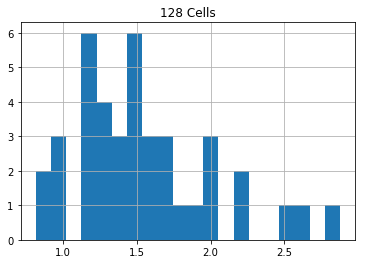

In [8]:
df_a7.hist(bins=20)
print("Mean: {}, Median: {}".format(df_a7.mean().values,df_a7.median().values))

# 6 Bisections, 64 Cells, 32 Points

In [9]:
bi6 = dd.bisect(bci,1000,500,level=6) # This will give 64/2=32 points
fr6 = dd.create_f(bi6,thresh=128) # Set the threshold the same everywhere
# Get unique species list
spl6 = fr6['sp'].unique()

In [10]:
# Now for each one get the preferred alpha value
alphas6 = []
for sp in spl6:
    args = fr6['sp']==sp
    sol = minimize_scalar(dd.loglikelihood,bounds=(0.1,4),method='bounded',
                args=(np.rint(fr6[args]['frac']*fr6[args]['n0']).astype(int),fr6[args]['n0']))
    alphas6.append(sol.x)
df_a6 = pd.DataFrame(alphas6,index=spl6,columns=['64 Cells'])

Mean: [1.48446707], Median: [1.40040883]


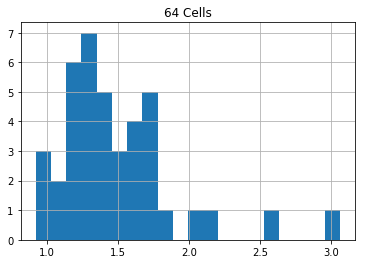

In [11]:
df_a6.hist(bins=20)
print("Mean: {}, Median: {}".format(df_a6.mean().values,df_a6.median().values))

# 5 Bisections, 32 Cells, 16 Points

In [12]:
bi5 = dd.bisect(bci,1000,500,level=5) # This will give 32/2=16 points
fr5 = dd.create_f(bi5,thresh=128)
# Get unique species list
spl5 = fr5['sp'].unique()

In [13]:
# Now for each one get the preferred alpha value
alphas5 = []
for sp in spl5:
    args = fr5['sp']==sp
    sol = minimize_scalar(dd.loglikelihood,bounds=(0.1,4),method='bounded',
                args=(np.rint(fr5[args]['frac']*fr5[args]['n0']).astype(int),fr5[args]['n0']))
    alphas5.append(sol.x)
df_a5 = pd.DataFrame(alphas5,index=spl5,columns=['32 Cells'])

Mean: [1.29974418], Median: [1.25177932]


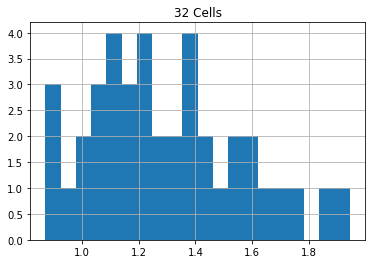

In [14]:
df_a5.hist(bins=20)
print("Mean: {}, Median: {}".format(df_a5.mean().values,df_a5.median().values))

# 4 Bisections, 16 Cells, 8 Points

In [15]:
bi4 = dd.bisect(bci,1000,500,level=4) # This will give 16/2=8 points
fr4 = dd.create_f(bi4,thresh=128) # I should set the threshold to at least be ABLE to have one individual per cell
# Get unique species list
spl4 = fr4['sp'].unique()

In [16]:
# Now for each one get the preferred alpha value
alphas4 = []
for sp in spl4:
    args = fr4['sp']==sp
    sol = minimize_scalar(dd.loglikelihood,bounds=(0.1,4),method='bounded',
                args=(np.rint(fr4[args]['frac']*fr4[args]['n0']).astype(int),fr4[args]['n0']))
    alphas4.append(sol.x)
df_a4 = pd.DataFrame(alphas4,index=spl4,columns=['16 Cells'])

Mean: [1.24358652], Median: [1.1960088]


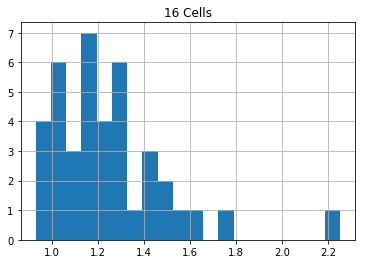

In [17]:
df_a4.hist(bins=20)
print("Mean: {}, Median: {}".format(df_a4.mean().values,df_a4.median().values))

# 3 Bisections, 8 Cells, 4 Points

In [18]:
bi3 = dd.bisect(bci,1000,500,level=3) # This will give 8/2=4 points
fr3 = dd.create_f(bi3,thresh=128)
# Get unique species list
spl3 = fr3['sp'].unique()

In [19]:
# Now for each one get the preferred alpha value
alphas3 = []
for sp in spl3:
    args = fr3['sp']==sp
    sol = minimize_scalar(dd.loglikelihood,bounds=(0.1,4),method='bounded',
                args=(np.rint(fr3[args]['frac']*fr3[args]['n0']).astype(int),fr3[args]['n0']))
    alphas3.append(sol.x)
df_a3 = pd.DataFrame(alphas3,index=spl3,columns=['8 Cells'])

Mean: [1.33661968], Median: [1.13930621]


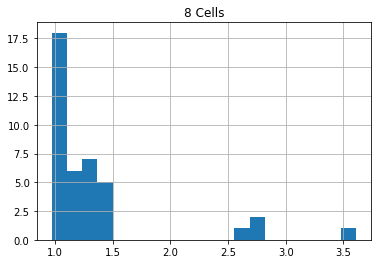

In [20]:
df_a3.hist(bins=20)
print("Mean: {}, Median: {}".format(df_a3.mean().values,df_a3.median().values))

# Comparing Alphas
Let's use the "density" plotting function just to get a rough idea of if this changes at all

In [21]:
df_c = df_a8.copy()
df_c = df_c.join(df_a7,how='outer')
df_c = df_c.join(df_a6,how='outer')
df_c = df_c.join(df_a5,how='outer')
df_c = df_c.join(df_a4,how='outer')
df_c = df_c.join(df_a3,how='outer')

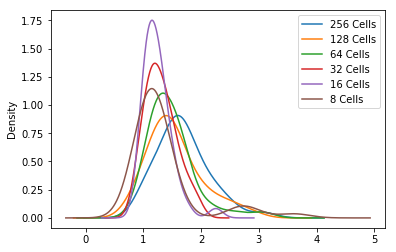

In [23]:
df_c.plot(kind='density')

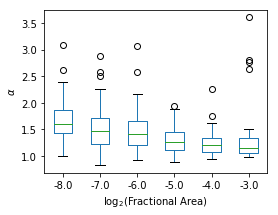

In [41]:
# Change columns to fractional area instead of number of cells
frac_a =[1/2**n for n in np.arange(3,9)] 
df_c.columns = np.log2(frac_a[::-1])

fig,ax=plt.subplots(figsize=(4,3))
df_c.plot(ax=ax,kind='box')
ax.set_ylabel(r'$\alpha$')
ax.set_xlabel(r'$\log_2$(Fractional Area)')
plt.savefig('alphaBoxHighThresh.pdf',format='pdf',bbox_inches='tight')
plt.savefig('Manuscript/alphaBoxHighThresh.eps',format='eps',bbox_inches='tight')
plt.savefig('Manuscript/alphaBoxHighThresh.pdf',format='pdf',bbox_inches='tight')

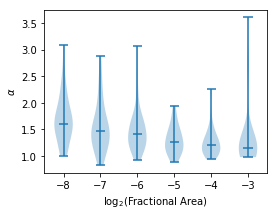

In [24]:
# Change columns to fractional area instead of number of cells
frac_a =[1/2**n for n in np.arange(3,9)] 
df_c.columns = np.log2(frac_a[::-1])

fig,ax=plt.subplots(figsize=(4,3))
ax.violinplot(dataset= [df_c[-8],df_c[-7],df_c[-6],df_c[-5],df_c[-4],df_c[-3]],positions = np.log2(frac_a[::-1]),
             showmedians=True,showextrema=True)
#df_c.plot(ax=ax,kind='box')
ax.set_ylabel(r'$\alpha$')
ax.set_xlabel(r'$\log_2$(Fractional Area)')
plt.savefig('alphaVioHighThresh.pdf',format='pdf',bbox_inches='tight')
plt.savefig('Manuscript/alphaVioHighThresh.eps',format='eps',bbox_inches='tight')
plt.savefig('Manuscript/alphaVioHighThresh.pdf',format='pdf',bbox_inches='tight')

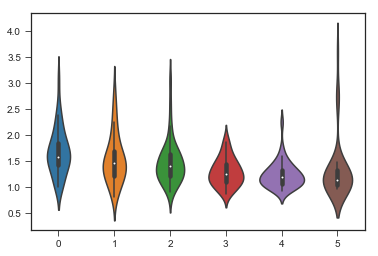

In [54]:
# Exploring with seaborn...
#import seaborn as sns
#sns.set_style('ticks')
#sns.violinplot(data=[df_c[-8],df_c[-7],df_c[-6],df_c[-5],df_c[-4],df_c[-3]])

In [42]:
# Let's get abundances of these species
spl_c = df_c.dropna().index
# Get abundances, all are the same so just use bi8
n0i = bi8.sum(axis=1)[spl_c]
n0max = max(n0i)

In [43]:
# Get the names of the most abundant
most_ab = n0i.sort_values(ascending=False)[0:8].index

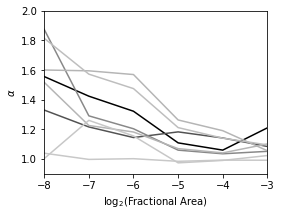

In [44]:
# Plot the most abundant species alone
fig,ax=plt.subplots(figsize=(4,3))#figsize=(6,4))
colors = cm.get_cmap('Greys')
n0max = max(n0i)
for sp in most_ab: # Only plot the most abundant
    df_c.loc[sp].T.plot(ax=ax,c=colors(n0i[sp]/n0max),label=sp)
ax.legend()
ax.set_ylim(0.9,2)
ax.set_xlabel(r'$\log_2$(Fractional Area)')
ax.set_ylabel(r'$\alpha$')
plt.savefig('alphaScaleMostAbundant.pdf',bbox_inches='tight')
plt.savefig('Manuscript/alphaScaleMostAbundant.eps',format='eps',bbox_inches='tight')
plt.savefig('Manuscript/alphaScaleMostAbundant.pdf',format='pdf',bbox_inches='tight')
ax.get_legend().remove()
plt.savefig('alphaScaleMostAbundant_nolegend.pdf',bbox_inches='tight')
plt.savefig('Manuscript/alphaScaleMostAbundant_nolegend.eps',format='eps',bbox_inches='tight')
plt.savefig('Manuscript/alphaScaleMostAbundant_nolegend.pdf',format='pdf',bbox_inches='tight')
plt.show()

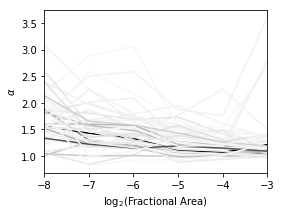

In [45]:
# All of them!
fig,ax=plt.subplots(figsize=(4,3))
colors = cm.get_cmap('Greys')#'Blues')
n0max = max(n0i)
for sp in spl_c: # Only plot the most abundant
    df_c.loc[sp].T.plot(ax=ax,c=colors(n0i[sp]/n0max),label=sp)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=4)
#ax.set_ylim(0.9,2)
ax.set_xlabel(r'$\log_2$(Fractional Area)')
ax.set_ylabel(r'$\alpha$')
plt.savefig('alphaScaleAllSpecies.pdf',bbox_inches='tight')
plt.savefig('Manuscript/alphaScaleAllSpecies.eps',format='eps',bbox_inches='tight')
plt.savefig('Manuscript/alphaScaleAllSpecies.pdf',format='pdf',bbox_inches='tight')
ax.get_legend().remove()
plt.savefig('alphaScaleAllSpecies_nolegend.pdf',bbox_inches='tight')
plt.savefig('Manuscript/alphaScaleAllSpecies_nolegend.eps',format='eps',bbox_inches='tight')
plt.savefig('Manuscript/alphaScaleAllSpecies_nolegend.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [22]:
df_c.mean(axis=1).sort_values()

GUSTSU    1.000991
SOCREX    1.051251
POULAR    1.067653
TRIPCU    1.116833
CECRIN    1.149215
CORDBI    1.156117
TRI2TU    1.183198
XYL1MA    1.187334
OCOTWH    1.187349
HIRTTR    1.189514
DRYPST    1.193783
BEILPE    1.232706
ALSEBL    1.252514
JAC1CO    1.269279
FARAOC    1.279998
UNONPI    1.325927
PROTTE    1.344662
OENOMA    1.378927
TAB2AR    1.383776
QUARAS    1.384646
AST1ST    1.401290
HEISCO    1.417191
ALCHCO    1.441294
HASSFL    1.445207
PRI2CO    1.447879
VIROSU    1.457563
SWARS1    1.489409
TET2PA    1.527605
VIROSE    1.536643
GUATDU    1.560589
SIMAAM    1.577402
GUARGU    1.584244
EUGEOE    1.595840
CORDLA    1.620748
RANDAR    1.702796
POUTRE    1.725728
SWARS2    1.754366
APEIME    2.002263
MAQUCO    2.307874
BROSAL    2.347726
dtype: float64

In [28]:
# The species from Condit 2000 Figure 1
sp_condit = ['OCOTWH','TRI2TU'] #,'RINOSY'] # Rinorea is not abundant enough
for s in sp_condit:
    print(df_c.loc[s])

256 Cells    1.540092
128 Cells    1.462280
64 Cells     1.254305
32 Cells     0.895417
16 Cells     0.941075
8 Cells      1.030922
Name: OCOTWH, dtype: float64
256 Cells    1.329928
128 Cells    1.216040
64 Cells     1.144534
32 Cells     1.182724
16 Cells     1.141667
8 Cells      1.084294
Name: TRI2TU, dtype: float64


In [32]:
# Formal outlier detection
q1, q3= np.percentile(df_c.mean(axis=1).sort_values(),[25,75])
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('lower: {:.3f}, upper: {:.3f}'.format(lower_bound,upper_bound))

lower: 0.635, upper: 2.123


By eye it looks like everything above 2 is pretty exceptional, so APEIME, MAQUCO, BROSAL, but formally only the top two are. GUSTSU is also notable (by eye) as it agrees with METE.

These correspond to Apeiba membranacea, Maquira guianensis, Brosimum alicastrum, and Gustavia superba.

Spoke with Bert: "A, membranacea and B. alicastrum are canopy (not emergent) trees; Gustavia strikes me as subcanopy". Nothing really striking about them. Also he expected Trichilia tuberculata (TRI2TU) to be density dependent, but it is the same as the others.

From Joe: "Apeiba membranacea is highly light demanding. It will only recruit successfully in largish gaps and only when it manages to stay near the top of the veg in the recovering gap. This means they won’t recruit in the shade of an established conspecific. This might lead to apparent density dependence when there is actually gap-dependence. I believe the name has also been changed to A. aspera.

Brosimum alicastrum is more shade tolerant, and Maquira guianensis is really shade tolerant. I can’t think of any reason to suspect artifact for these two species.

Gustavia superba is a secondary forest species. It is largely limited to two hectares of young (perhaps 130 years old) secondary forest along the northern edge of the 50-ha plot. This distributional limitation might cause apparent density independence if you considered the 48 ha of old-growth forest to be appropriate habitat."

In [44]:
# No trend
print(bci[bci['sp']=='APEIME']['dbh'].mean(),
bci[bci['sp']=='MAQUCO']['dbh'].mean(),
bci[bci['sp']=='BROSAL']['dbh'].mean(),
bci[bci['sp']=='GUSTSU']['dbh'].mean())
print()
print(len(bci[bci['sp']=='APEIME']),
len(bci[bci['sp']=='MAQUCO']),
len(bci[bci['sp']=='BROSAL']), # Somewhere in the middle?
len(bci[bci['sp']=='GUSTSU'])) # Kind of high but not the highest
# Nothing

365.11219512195123 123.37254901960785 290.9609756097561 196.66882067851373

205 153 205 619


# Comparing Aggregate Alpha

In [32]:
al8 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.7),method='bounded',
                args=(np.rint(fr8['frac']*fr8['n0']).astype(int),fr8['n0']))
al8

     fun: 5102.272827297579
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 1.4741626043377765

In [33]:
al7 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.7),method='bounded',
                args=(np.rint(fr7['frac']*fr7['n0']).astype(int),fr7['n0']))
al7

     fun: 3809.5707421279435
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 1.3309634423695322

In [34]:
al6 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.7),method='bounded',
                args=(np.rint(fr6['frac']*fr6['n0']).astype(int),fr6['n0']))
al6

     fun: 2572.974786163996
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 1.2766336568614507

In [35]:
al5 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.7),method='bounded',
                args=(np.rint(fr5['frac']*fr5['n0']).astype(int),fr5['n0']))
al5

     fun: 1760.216518134225
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 1.1153397228298028

In [36]:
al4 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.7),method='bounded',
                args=(np.rint(fr4['frac']*fr4['n0']).astype(int),fr4['n0']))
al4

     fun: 1084.3302513656631
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 1.077845720869762

In [37]:
al3 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.7),method='bounded',
                args=(np.rint(fr3['frac']*fr3['n0']).astype(int),fr3['n0']))
al3

     fun: 652.535007778232
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 1.0553799361132674

In [38]:
# Get bisections for level 2 and one also
bi2 = dd.bisect(bci,1000,500,level=2)
fr2 = dd.create_f(bi2,thresh=128)
al2 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.7),method='bounded',
                args=(np.rint(fr2['frac']*fr2['n0']).astype(int),fr2['n0']))
al2

     fun: 379.18240189601335
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: 1.034036151861618

In [39]:
bi1 = dd.bisect(bci,1000,500,level=1)
fr1 = dd.create_f(bi1,thresh=128)
al1 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.3),method='bounded',
                args=(np.rint(fr1['frac']*fr1['n0']).astype(int),fr1['n0']))
al1

     fun: 200.58173849127613
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 1.0541827449042847

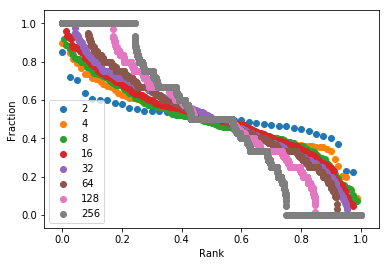

In [44]:
plt.scatter(np.arange(len(fr1))/len(fr1),fr1['frac'].sort_values(ascending=False),label='2')
plt.scatter(np.arange(len(fr2))/len(fr2),fr2['frac'].sort_values(ascending=False),label='4')
plt.scatter(np.arange(len(fr3))/len(fr3),fr3['frac'].sort_values(ascending=False),label='8')
plt.scatter(np.arange(len(fr4))/len(fr4),fr4['frac'].sort_values(ascending=False),label='16')
plt.scatter(np.arange(len(fr5))/len(fr5),fr5['frac'].sort_values(ascending=False),label='32')
plt.scatter(np.arange(len(fr6))/len(fr6),fr6['frac'].sort_values(ascending=False),label='64')
plt.scatter(np.arange(len(fr7))/len(fr7),fr7['frac'].sort_values(ascending=False),label='128')
plt.scatter(np.arange(len(fr8))/len(fr8),fr8['frac'].sort_values(ascending=False),label='256')
plt.ylabel('Fraction')
plt.xlabel('Rank')
plt.legend()
plt.show()

In [45]:
al_ag = [al8.x,al7.x,al6.x,al5.x,al4.x,al3.x,al2.x,al1.x]

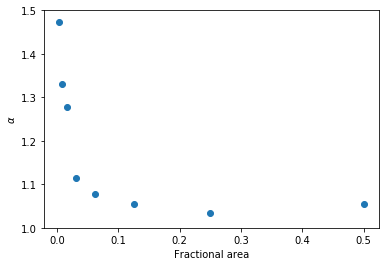

In [51]:
# Instead of cells, what if we use fraction area on the x axis
al_ag_xa = [1/2**n for n in np.arange(1,9)]
plt.plot(al_ag_xa,al_ag[::-1],'o')
plt.xlabel('Fractional area')
plt.ylabel(r'$\alpha$')
plt.ylim(1,1.5)
plt.show()

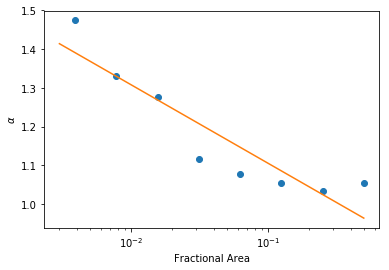

Slope = -0.203, Intercept = 0.90, p = 0.001331, R = -0.92, sigma = 0.036


In [56]:
# Linear regression
from scipy.stats import linregress

lr_ag_a = linregress(np.log10(al_ag_xa),al_ag[::-1])

plt.semilogx(al_ag_xa,al_ag[::-1],'o')

Xa_plot = np.linspace(0.003,0.5,100)
plt.semilogx(Xa_plot, np.log10(Xa_plot)*lr_ag_a[0] + lr_ag_a[1])
plt.xlabel('Fractional Area')
plt.ylabel(r'$\alpha$')

plt.savefig('AggregateAlphaScalingHighThresh.pdf',format='pdf',bbox_inches='tight')
#plt.savefig('Manuscript/AggregateAlphaScalingHighThresh.eps',format='eps',bbox_inches='tight')
#plt.savefig('Manuscript/AggregateAlphaScalingHighThresh.eps',format='eps',bbox_inches='tight')
plt.show()
print("Slope = {:.3f}, Intercept = {:.2f}, p = {:.4}, R = {:.2f}, sigma = {:.3f}".format(
    lr_ag_a[0],lr_ag_a[1],lr_ag_a[3],lr_ag_a[2],lr_ag_a[4]))

# Does this scaling depend on dbh?
Does the way that $\alpha$ scales depend on the size of the plant? Let's check by taking the per species $\alpha$ scaling but colouring by dbh. Then we can try fitting lines through them and seeing if the slope correlates to dbh.

In [46]:
# First get mean dbh for each species
# Set up a dataframe with columns for mean dbh and the slope
dbh_mean = pd.DataFrame(index=bci.sp.unique(),columns=['Mean dbh','Slope'])
for sp in bci.sp.unique():
    dbh_mean['Mean dbh'].loc[sp] = bci[bci['sp']==sp]['dbh'].mean() # Calculate mean for each species

In [47]:
df_c.columns = ['256 Cells','128 Cells','64 Cells','32 Cells','16 Cells','8 Cells']

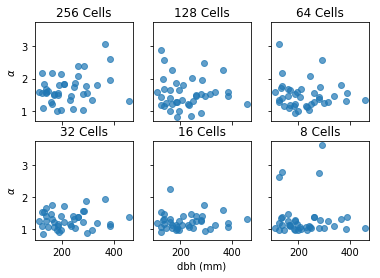

In [48]:
# Check that at any individual scale, the alphas aren't determined according to the dbh, 
# rather than looking at the slope of the scaling relationship.
fig,axes = plt.subplots(nrows=2,ncols=3,sharey=True,sharex=True)#figsize=(10,6) works ok
axes[0,0].plot(dbh_mean.loc[df_c['256 Cells'].dropna().index]['Mean dbh'],df_c['256 Cells'].dropna().values,'o',alpha=0.7)
axes[0,1].plot(dbh_mean.loc[df_c['128 Cells'].dropna().index]['Mean dbh'],df_c['128 Cells'].dropna().values,'o',alpha=0.7)
axes[0,2].plot(dbh_mean.loc[df_c['64 Cells'].dropna().index]['Mean dbh'],df_c['64 Cells'].dropna().values,'o',alpha=0.7)
axes[1,0].plot(dbh_mean.loc[df_c['32 Cells'].dropna().index]['Mean dbh'],df_c['32 Cells'].dropna().values,'o',alpha=0.7)
axes[1,1].plot(dbh_mean.loc[df_c['16 Cells'].dropna().index]['Mean dbh'],df_c['16 Cells'].dropna().values,'o',alpha=0.7)
axes[1,2].plot(dbh_mean.loc[df_c['8 Cells'].dropna().index]['Mean dbh'],df_c['8 Cells'].dropna().values,'o',alpha=0.7)

axes[0,0].set_title('256 Cells')
axes[0,1].set_title('128 Cells')
axes[0,2].set_title('64 Cells')
axes[1,0].set_title('32 Cells')
axes[1,1].set_title('16 Cells')
axes[1,2].set_title('8 Cells')

#for a in axes[1,:]:
#    a.set_xlabel('dbh')
axes[1,1].set_xlabel('dbh (mm)')

for a in axes[:,0]:
    a.set_ylabel(r'$\alpha$')
#axes[0,0].set_ylabel(r'$\alpha$')
    
plt.savefig('dbhHighThresh.pdf',format='pdf',bbox_inches='tight')
plt.savefig('Manuscript/appendix_dbh.pdf',format='pdf',bbox_inches='tight')

# Does it depend on abundance?

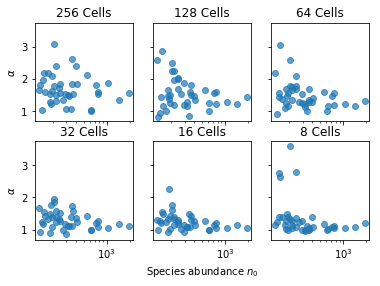

In [49]:
# Got abundances above for plot with a few of the most abundant on it.
fig,axes = plt.subplots(nrows=2,ncols=3,sharey=True,sharex=True)
axes[0,0].semilogx(n0i.loc[df_c['256 Cells'].dropna().index],df_c['256 Cells'].dropna().values,'o',alpha=0.7)
axes[0,1].semilogx(n0i.loc[df_c['128 Cells'].dropna().index],df_c['128 Cells'].dropna().values,'o',alpha=0.7)
axes[0,2].semilogx(n0i.loc[df_c['64 Cells'].dropna().index],df_c['64 Cells'].dropna().values,'o',alpha=0.7)
axes[1,0].semilogx(n0i.loc[df_c['32 Cells'].dropna().index],df_c['32 Cells'].dropna().values,'o',alpha=0.7)
axes[1,1].semilogx(n0i.loc[df_c['16 Cells'].dropna().index],df_c['16 Cells'].dropna().values,'o',alpha=0.7)
axes[1,2].semilogx(n0i.loc[df_c['8 Cells'].dropna().index],df_c['8 Cells'].dropna().values,'o',alpha=0.7)

axes[0,0].set_title('256 Cells')
axes[0,1].set_title('128 Cells')
axes[0,2].set_title('64 Cells')
axes[1,0].set_title('32 Cells')
axes[1,1].set_title('16 Cells')
axes[1,2].set_title('8 Cells')

#for a in axes[1,:]:
#    a.set_xlabel(r'Species abundance $n_0$')
axes[1,1].set_xlabel(r'Species abundance $n_0$')

for a in axes[:,0]:
    a.set_ylabel(r'$\alpha$')
    
plt.savefig('abundanceHighThresh.pdf',format='pdf',bbox_inches='tight')
plt.savefig('Manuscript/appendix_abundance.pdf',format='pdf',bbox_inches='tight')

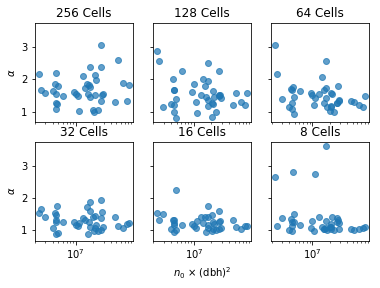

In [50]:
# Got abundances above for plot with a few of the most abundant on it.
fig,axes = plt.subplots(nrows=2,ncols=3,sharey=True,sharex=True)
axes[0,0].semilogx(n0i.loc[df_c['256 Cells'].dropna().index]*dbh_mean.loc[df_c['256 Cells'].dropna().index]['Mean dbh']**(2),df_c['256 Cells'].dropna().values,'o',alpha=0.7)
axes[0,1].semilogx(n0i.loc[df_c['128 Cells'].dropna().index]*dbh_mean.loc[df_c['128 Cells'].dropna().index]['Mean dbh']**(2),df_c['128 Cells'].dropna().values,'o',alpha=0.7)
axes[0,2].semilogx(n0i.loc[df_c['64 Cells'].dropna().index]*dbh_mean.loc[df_c['64 Cells'].dropna().index]['Mean dbh']**(2),df_c['64 Cells'].dropna().values,'o',alpha=0.7)
axes[1,0].semilogx(n0i.loc[df_c['32 Cells'].dropna().index]*dbh_mean.loc[df_c['32 Cells'].dropna().index]['Mean dbh']**(2),df_c['32 Cells'].dropna().values,'o',alpha=0.7)
axes[1,1].semilogx(n0i.loc[df_c['16 Cells'].dropna().index]*dbh_mean.loc[df_c['16 Cells'].dropna().index]['Mean dbh']**(2),df_c['16 Cells'].dropna().values,'o',alpha=0.7)
axes[1,2].semilogx(n0i.loc[df_c['8 Cells'].dropna().index]*dbh_mean.loc[df_c['8 Cells'].dropna().index]['Mean dbh']**(2),df_c['8 Cells'].dropna().values,'o',alpha=0.7)

axes[0,0].set_title('256 Cells')
axes[0,1].set_title('128 Cells')
axes[0,2].set_title('64 Cells')
axes[1,0].set_title('32 Cells')
axes[1,1].set_title('16 Cells')
axes[1,2].set_title('8 Cells')

#for a in axes[1,:]:
#    a.set_xlabel(r'Species abundance $n_0$')
axes[1,1].set_xlabel(r'$n_0$ $\times$ (dbh)$^2$')

for a in axes[:,0]:
    a.set_ylabel(r'$\alpha$')
    
plt.savefig('energyHighThresh.pdf',format='pdf',bbox_inches='tight')
plt.savefig('Manuscript/appendix_energy.pdf',format='pdf',bbox_inches='tight')